#### Import libraries:
* google.cloud for using BigQuery
* pandas for analysis
* matplotlib and seaborn for visualization

In [1]:
from google.cloud import bigquery

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Create client object and quick look at the datasets.

In [3]:
client = bigquery.Client()

dataset_info_query = """
SELECT *
FROM `bigquery-public-data.usa_names.__TABLES__`
"""

dataset_info = client.query(dataset_info_query).to_dataframe()

dataset_info[['table_id', 'row_count', 'size_bytes']]

Using Kaggle's public dataset BigQuery integration.


,table_id,row_count,size_bytes
0,usa_1910_2013,5552452,171432506
1,usa_1910_current,6311504,194873810


#### Quick look at the first 5 rows of a table containing data from 1910 to 2021.

In [4]:
df_five_rows_query = """
SELECT *
FROM `bigquery-public-data.usa_names.usa_1910_current`
LIMIT 5
"""

df_five_rows = client.query(df_five_rows_query).to_dataframe()
df_five_rows

,state,gender,year,name,number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [5]:
df_last_rows_query = """
SELECT *
FROM `bigquery-public-data.usa_names.usa_1910_current`
ORDER BY 3 DESC
LIMIT 5
"""

df_last_rows = client.query(df_last_rows_query).to_dataframe()
df_last_rows

,state,gender,year,name,number
0,AK,F,2021,Olivia,31
1,AK,F,2021,Charlotte,30
2,AK,F,2021,Ava,30
3,AK,F,2021,Hazel,32
4,AK,F,2021,Amelia,42


#### What are the most common female names from all years?

In [6]:
most_common_female_all_query = """
SELECT name, COUNT(*) as count
FROM `bigquery-public-data.usa_names.usa_1910_current`
WHERE gender = 'F'
GROUP BY name
ORDER BY count DESC
LIMIT 15
"""

most_common_female_all = client.query(most_common_female_all_query).to_dataframe()

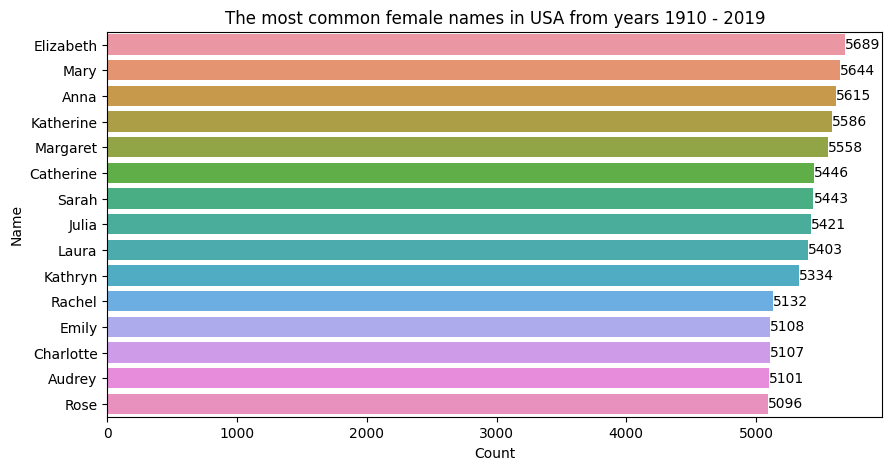

In [7]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data = most_common_female_all,
    x = 'count',
    y = 'name',
    orient = 'h',
    width = 0.8)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('The most common female names in USA from years 1910 - 2019')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

#### What are the most common female names from all years?

In [8]:
most_common_male_all_query = """
SELECT name, COUNT(*) as count
FROM `bigquery-public-data.usa_names.usa_1910_current`
WHERE gender = 'M'
GROUP BY name
ORDER BY count DESC
LIMIT 15
"""

most_common_male_all = client.query(most_common_male_all_query).to_dataframe()

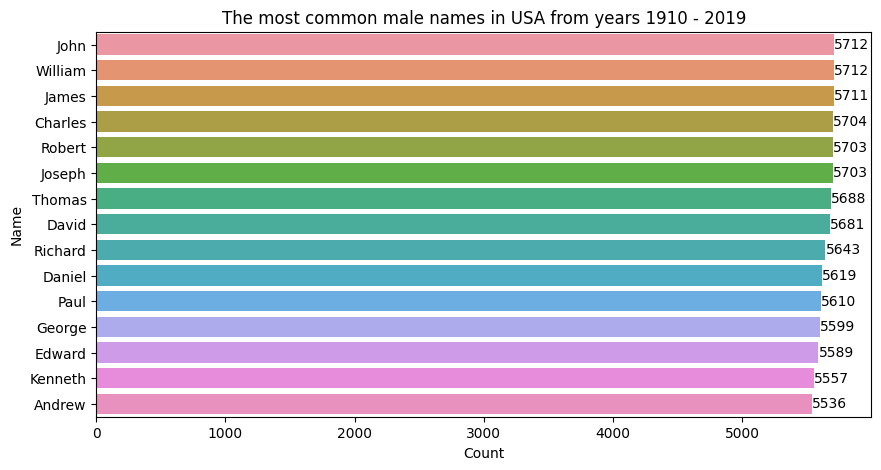

In [9]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data = most_common_male_all,
    x = 'count',
    y = 'name',
    orient = 'h',
    width = 0.8)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('The most common male names in USA from years 1910 - 2019')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

#### How the quantity of the name "John" has changed over the years 1910 - 2021?

In [10]:
john_query = """
SELECT year, COUNT(*) as count
FROM `bigquery-public-data.usa_names.usa_1910_current`
WHERE name = 'John'
GROUP BY year
ORDER BY year
"""

john = client.query(john_query).to_dataframe()

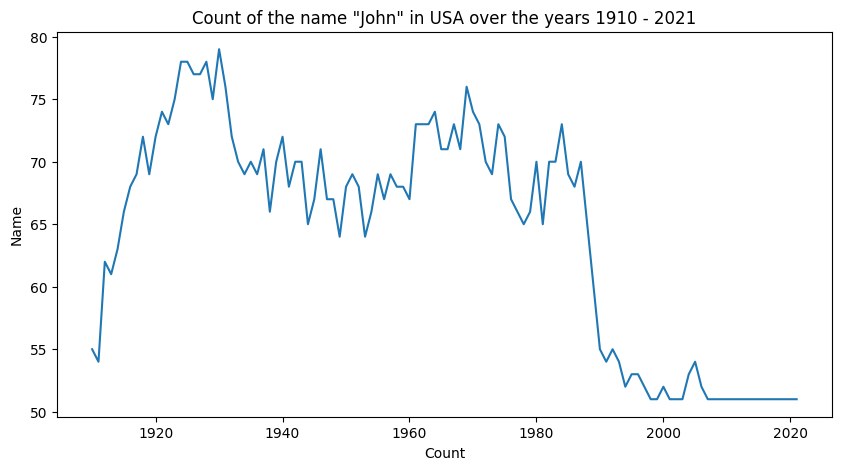

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    x='year', 
    y='count', 
    data=john)
plt.title('Count of the name "John" in USA over the years 1910 - 2021')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

#### How the quantity of the name "Elizabeth" has changed over the years 1910 - 2021?

In [12]:
elizabeth_query = """
SELECT year, COUNT(*) as count
FROM `bigquery-public-data.usa_names.usa_1910_current`
WHERE name = 'Elizabeth'
GROUP BY year
ORDER BY year
"""

elizabeth = client.query(elizabeth_query).to_dataframe()

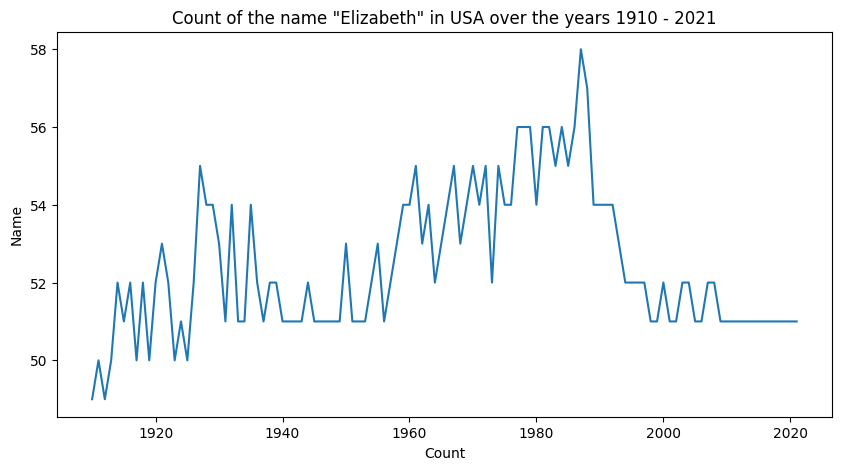

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    x='year', 
    y='count', 
    data=elizabeth)
plt.title('Count of the name "Elizabeth" in USA over the years 1910 - 2021')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

#### Are there more female or male names in 2021?

In [14]:
gender_2021_query = """
SELECT gender, year, SUM(number) as sum
FROM `bigquery-public-data.usa_names.usa_1910_current`
WHERE year = 2021
GROUP BY gender, year
"""

gender_2021 = client.query(gender_2021_query).to_dataframe()
gender_2021

,gender,year,sum
0,F,2021,1320095
1,M,2021,1492780


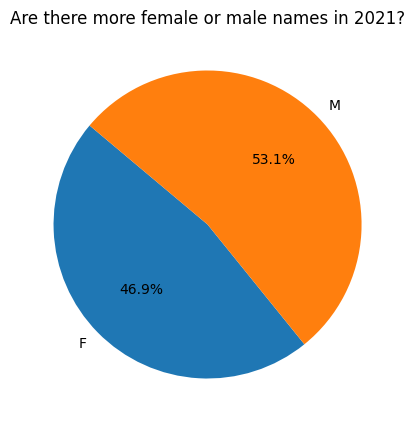

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(gender_2021['sum'], labels=gender_2021['gender'], autopct='%1.1f%%', startangle=140)
plt.title('Are there more female or male names in 2021?')
plt.show()